### Name: Tirthraj Bhalodiya 
### SRN: PES2UG21CS118
### Guide Name: Dr. P Kokila

In [1]:
!pip install transformers torch torchvision
!pip install sentencepiece  # sometimes needed for tokenizer

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
import torch
from transformers import CLIPProcessor, CLIPModel, GPT2Tokenizer, GPT2LMHeadModel
from IPython.display import display
from PIL import Image
import os

**Explanation**:  
We import the necessary libraries:
- **`torch`** for tensor computations.
- **`transformers`** for using pretrained models like CLIP and GPT-2.
- **`PIL` (Python Imaging Library)** for image loading and processing.
- **`IPython.display`** to display images within the notebook.
- **`os`** for handling file paths (optional in this context).

In [3]:
# Load CLIP
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load GPT-2
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt_model.eval()


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

**Explanation**:  
This block loads:
- The **CLIP model** and its **processor** to match images with text labels.
- The **GPT-2 model** and its **tokenizer** to generate text based on prompts.
- `gpt_model.eval()` sets the model to **evaluation mode** to disable training behavior like dropout.

In [4]:
#Define use-cases and prompts
use_cases = {
    "medical": {
        "labels": ["an MRI scan with a tumor", "a normal brain MRI", "an X-ray with fracture", "a CT scan"],
        "prompt": "This image appears to be a medical scan. Based on the content, we can infer: "
    },
    "fashion": {
        "labels": ["a woman wearing a red dress", "a man in a suit", "a fashion runway", "a casual outfit"],
        "prompt": "This image appears to be a fashion photo. Here's a marketing copy: "
    },
    "microscopy": {
        "labels": ["a microscopic image of cells", "a bacteria culture", "a virus under microscope", "a tissue sample"],
        "prompt": "This is a microscopy image. Scientifically, this could imply: "
    },
    "nature": {
        "labels": ["a mountain landscape", "a forest", "a beach", "an ocean pollution scene"],
        "prompt": "This is a natural scene. Here's a creative caption or fact: "
    }
}


# Local image paths (use raw strings to handle backslashes properly)
image_paths = {
    "medical": r"C:\Users\tirthraj bhalodiya\Desktop\C3I_Assignment\Tumor.jpeg",
    "fashion": r"C:\Users\tirthraj bhalodiya\Desktop\C3I_Assignment\Fashion.png",
    "microscopy": r"C:\Users\tirthraj bhalodiya\Desktop\C3I_Assignment\Microscope view of humen cell.jpeg",
    "nature": r"C:\Users\tirthraj bhalodiya\Desktop\C3I_Assignment\Nature.jpeg"
}


**Explanation**:  
We define:
- Four use-cases: **medical**, **fashion**, **microscopy**, and **nature**.
- Each use-case includes a list of **labels** (descriptive phrases for classification) and a **prompt** (used to generate contextual text).
- File paths for each category’s image are specified using **raw strings** (to prevent issues with Windows-style backslashes).

In [5]:
def classify_image(image, labels):
    inputs = clip_processor(text=labels, images=image, return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)[0]
    best_index = probs.argmax().item()
    return labels[best_index], probs[best_index].item()


**Explanation**:  
This function:
- Takes an image and a list of labels.
- Uses the CLIP processor to convert them into model-readable format.
- Computes similarity scores between the image and each label.
- Applies **softmax** to get probabilities and returns:
  - The **most likely label**.
  - The **confidence score**.

In [6]:
def generate_text(prompt, max_length=150):
    input_ids = gpt_tokenizer.encode(prompt, return_tensors="pt")
    output_ids = gpt_model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        temperature=0.8,
        top_p=0.95,
        do_sample=True,
        pad_token_id=gpt_tokenizer.eos_token_id
    )
    return gpt_tokenizer.decode(output_ids[0], skip_special_tokens=True)


**Explanation**:  
This function:
- Takes a **prompt** and encodes it using GPT-2 tokenizer.
- Uses GPT-2 to generate a continuation of the prompt.
- Sampling is done using:
  - `temperature`: controls creativity.
  - `top_p`: nucleus sampling for top probable tokens.
  - `no_repeat_ngram_size`: avoids repetitive outputs.
- Returns a decoded, **natural language** output.


🔍 CATEGORY: MEDICAL


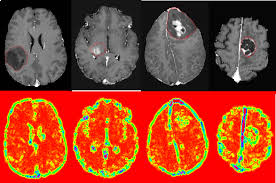

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🧠 Predicted Label: an MRI scan with a tumor (Confidence: 0.60)
📝 Generated Text:
This image appears to be a medical scan. Based on the content, we can infer: an MRI scan with a tumor-based image of the patient. The patient is not conscious.

We can also infer a CT scan without the CT scans. Because the scan is a scan of a patient, it cannot be interpreted as an actual tumor, as there is no way to interpret the image without an imaging technique that can be applied to a person's head.

🔍 CATEGORY: FASHION


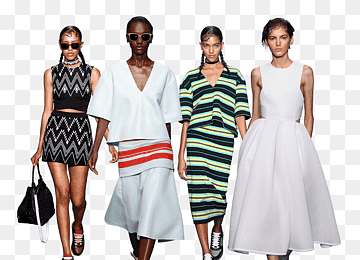

🧠 Predicted Label: a fashion runway (Confidence: 1.00)
📝 Generated Text:
This image appears to be a fashion photo. Here's a marketing copy: a fashion runway show from the '80s and '90s.


What does this mean for your business?

Not necessarily. But it's always interesting. It might be something that you find interesting for business or entertainment. For example, if a show goes viral, it might help other businesses out, because they might see it and think it goes against the image of the show.


 (Courtesy of L.L. Bean and Co. )
 (Photo courtesy of Courtesy ofL-L Bean )

. (Credit: L-Lin Bean, Lulu)
, the designer of a new pop-culture collection, debuted her latest line

🔍 CATEGORY: MICROSCOPY


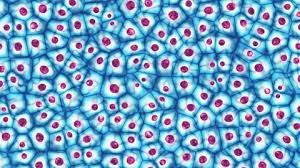

🧠 Predicted Label: a virus under microscope (Confidence: 0.54)
📝 Generated Text:
This is a microscopy image. Scientifically, this could imply: a virus under microscope can cause an infection with a known pathogen. If this is the case, then the virus could cause the infection.

It is important to understand that viruses are not the same. They are very different. In viruses, the type of infection and the types of the pathogenic microbes are determined by their type. To this day, there are still different types, each with its own characteristics. The most obvious example is "macrophages." These are the particles that are usually called microorganisms. On a molecular level, these particles can be viruses or bacteria. Some viruses have a bacterium, some have no bacterioreactor, and some are

🔍 CATEGORY: NATURE


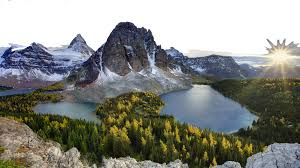

🧠 Predicted Label: a mountain landscape (Confidence: 1.00)
📝 Generated Text:
This is a natural scene. Here's a creative caption or fact: a mountain landscape, just north of a stream. But, on closer inspection, you can tell the trees have been cut down by a large brush, or even a tree, as is done here.

Advertisement
, which is the largest of its kind, is in fact a grassy landscape. And, if you go around it like that, the brush will do a lot of damage. One of the things I like about the grass is how it looks on the ground. It's almost like a really big, green house. This is what we call a "grass garden," which in this case is called the "forest." It has a dense grass and a forest


In [7]:
for category, img_path in image_paths.items():
    print(f"\n🔍 CATEGORY: {category.upper()}")

    # Load and show image
    image = Image.open(img_path)
    if image.mode != "RGB":
        image = image.convert("RGB")
    display(image)

    # Get use-case config
    config = use_cases[category]
    labels = config["labels"]
    prompt_base = config["prompt"]

    # Classification
    predicted_label, confidence = classify_image(image, labels)
    print(f"🧠 Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")

    # Text Generation
    full_prompt = prompt_base + predicted_label
    generated = generate_text(full_prompt)
    print(f"📝 Generated Text:\n{generated}")

**Explanation**:  
This block:
- Iterates over each category and its associated image.
- Displays the image using IPython.
- Gets the use-case-specific labels and prompt.
- Classifies the image using the **`classify_image`** function.
- Generates a caption or descriptive text using the **`generate_text`** function.
- Prints the predicted label, confidence, and generated text.

# 📌 Final Summary: Project Overview

## 🧾 Project Summary

This project demonstrates a **multimodal AI pipeline** combining **vision and language** models for automatic image understanding and captioning.

### 🔍 Objective
To automatically:
1. **Classify** an image into a domain-specific label using CLIP.
2. **Generate** a relevant, meaningful textual description using GPT-2.

### 🛠️ Tools & Technologies
- **CLIP (openai/clip-vit-base-patch32)**: for image-text matching.
- **GPT-2 (gpt2)**: for creative or informative text generation.
- **PIL** and **IPython.display**: for image handling and visualization.

### 🧠 Use-Cases
- **Medical**: MRI scans, X-rays, etc.
- **Fashion**: Clothing and runway images.
- **Microscopy**: Cell and bacteria imagery.
- **Nature**: Landscapes, pollution, etc.

### 🖼️ Output
For each image:
- **Visual Display** of the image.
- **Predicted Label** with confidence.
- **Generated Description** using GPT-2.